In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try:
    import google.colab
    IN_COLAB = True
    !pip3 install sympy==1.10
except:
    IN_COLAB = False

from icecream import ic

from sympy import *
from sympy import Abs
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
print("Sympy version "+sympy.__version__)
init_printing(use_unicode=True)

a, x, g, X, G, tau = symbols('a x g X G tau', cls = Function)

t0p = 0+np.finfo(float).eps

Running Python: 3.8.17
Running Sympy: 1.12rc1
Sympy version 1.12rc1


## Circuit example from class

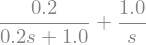

In [2]:
x0 = 2
RC = 1/5
W = laplace_transform(Heaviside(t,0), t, s, noconds = True)

eom = Eq((s*X(s)-x0) + X(s)/RC, W/RC)
Xofs = solve(eom,X(s)) 
Xofs[0].apart()

In [3]:
y_soln = inverse_laplace_transform(Xofs[0],s,t)
y_soln

In [4]:
y0_pos = y_soln.subs(t,t0p) 
print(f'yy_soln was {x0:.2f} and is {y0_pos:.2f}')

yy_soln was 2.00 and is 2.00


## Example 3 in Rec 7

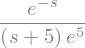

In [5]:
X = laplace_transform(sympy.exp(-5*t)*Heaviside(t-1), t, s, noconds = True)
X

## Example 2 in Rec 7

In [6]:
g = sympy.exp(-1*sympy.Abs(t))
g

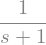

In [7]:
X = laplace_transform(g, t, s, noconds = True)
X

## 3rd order systems

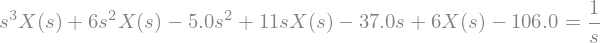

In [8]:
x, g, X = symbols('x g X', cls = Function)

x0 = 5.0 
v0 = 7.0
a0 = 9.0

a = 1
b = 6
c = 11
d = 6
W = laplace_transform(Heaviside(t,0), t, s, noconds = True)
eom  = Eq(a*(X(s)*s**3 - s**2*x0 - s*v0 - a0) + b*(s**2 *X(s)- s*x0 - v0) + c*(s*X(s) - x0) + d * X(s), W)
eom.replace(Heaviside(0), 0)

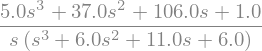

In [9]:
Xofs = solve(eom,X(s))[0]
Xofs

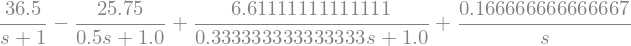

In [10]:
Xofs.apart()

In [11]:
expand((s+1)*(s+2)*(s+3))

In [12]:
x_soln = inverse_laplace_transform(Xofs.apart(),s,t)
x_soln.simplify()

In [13]:
n,d=fraction(Xofs)
6*n.subs(s,-3)/-3/-2/-1

In [14]:
print(f'{x_soln.subs(t,t0p):.2f}')

5.00


In [15]:
print(f'{x_soln.diff().subs(t,t0p):.2f}')

7.00


In [16]:
print(f'{x_soln.diff().diff().subs(t,t0p):.2f}')

9.00


## Example 6 in Topic 13

In [17]:
x, g, X = symbols('x g X', cls = Function)

x0_minus = 0 
xdot0_minus = 0

a = 2
b = 7
c = 3
d = 1
W = laplace_transform(DiracDelta(t), t, s, noconds = True)
eom  = Eq(a*(s**2 *X(s)- s*x0_minus - xdot0_minus) + b*(s*X(s) - x0_minus) + c * X(s), d*W)

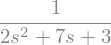

In [18]:
Xofs = solve(eom,X(s))[0]
Xofs

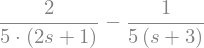

In [19]:
Xofs.apart()

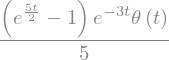

In [20]:
x_soln = inverse_laplace_transform(Xofs.apart(),s,t)
x_soln.simplify()

In [21]:
print(f'{x_soln.subs(t,t0p):.2f}')

0.00


In [22]:
print(f'{x_soln.diff().subs(t,t0p):.2f}')

0.50


## ODE/Integral

In [23]:
eom  = Eq(2*(s*X(s) - 1) + 5*X(s) + 3 * X(s)/s + 4 , 4/(s**2+16))

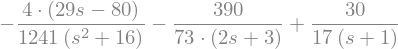

In [24]:
Xofs = solve(eom,X(s))[0]
Xofs.apart()